In [1]:
import time
import os
import datetime
import string
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import dateutil
from dateutil.parser import parse
from datetime import datetime

 **1. Data Gathering: getting the data from Heurist**


In [7]:
# Import file with as a pandas dataframe
df = pd.read_csv("/Users/hernanadasme/Documents/data_challenges/data_box/boxers_03_02.csv")
df.head()

,Boxer H-ID,Cathegory,Weight,Weight_kgs,Family name,Given name(s),Job Affiliation,Age,City,Gender,Source year,Source,Club Affiliation H-ID,Club Affiliation RecordTitle
0,4,Amateur,NaN,NaN,Barrera,Alejandro,NaN,NaN,NaN,NaN,1923-03-15,Los Sports,NaN,NaN
1,5,NaN,NaN,NaN,Ovando,Luis,NaN,NaN,Chile,NaN,1924-01-11,Los Sports,NaN,NaN
2,8,NaN,NaN,NaN,Hellfman,Federico,NaN,NaN,NaN,NaN,1924-01-11,Los Sports,NaN,NaN
3,12,Amateur,NaN,NaN,Rojas,Victor M.,NaN,NaN,San Felipe,Male,1923-01-11,Los Sports,NaN,NaN
4,13,NaN,Pesado,NaN,Zárate,Manuel,NaN,NaN,San Felipe,Male,1924-01-11,Los Sports,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Boxer H-ID                    471 non-null    int64  
 1   Cathegory                     460 non-null    object 
 2   Weight                        113 non-null    object 
 3   Weight_kgs                    66 non-null     float64
 4   Family name                   471 non-null    object 
 5   Given name(s)                 463 non-null    object 
 6   Job Affiliation               88 non-null     object 
 7   Age                           12 non-null     float64
 8   City                          230 non-null    object 
 9   Gender                        364 non-null    object 
 10  Source year                   471 non-null    object 
 11  Source                        471 non-null    object 
 12  Club Affiliation H-ID         201 non-null    object 
 13  Club 

In [12]:
df.isnull().sum()

Boxer H-ID                        0
Cathegory                        11
Weight                          358
Weight_kgs                      405
Family name                       0
Given name(s)                     8
Job Affiliation                 383
Age                             459
City                            241
Gender                          107
Source year                       0
Source                            0
Club Affiliation H-ID           270
Club Affiliation RecordTitle    270
dtype: int64

In [13]:
#check for duplicates
sum(df.duplicated())

0

# Visual Assessment: 
## Quality 
> - Missing values on columns `weight`, `weight_kgs`, `family_name`, `given_name`, `age`, `gender` 
> - Null values on `gender` that should be 'male'
> - Erroneous datatypes: Timestamp column not in `datetime` datatype; `age` float datatype, `weight_kgs` float datatype
> - Data from `weight` and `city` is messy.  
> - Coulumn that will not be used


**Define**
- Drop `Club Affiliation H - ID`

In [ ]:
df.drop(['Club Affiliation H-ID'], axis = 1, inplace = True)

In [19]:
df.sample(2)

,Boxer H-ID,Cathegory,Weight,Weight_kgs,Family name,Given name(s),Job Affiliation,Age,City,Gender,Source year,Source,Club Affiliation RecordTitle
263,600,Amateur,gallo,NaN,Conde,Carlos,NaN,NaN,Valdivia,Male,1924-04-11,Los Sports,Luis Vicentini Boxing Club
143,379,Amateur,minimum,NaN,Belmar,Segundo,Compañia Chilena de Electricidad,8.0,NaN,NaN,1925,AF0014517,Centro Deportivo Medidores


In [ ]:
**Define**
- Fill Nan with 'Male' on cloumn `Gender`

In [20]:
df.Gender = df.Gender.fillna('Male')

In [21]:
df.Gender.value_counts()

Male      468
Female      3
Name: Gender, dtype: int64

**Change column names**

In [29]:
df.rename({'Boxer H-ID': 'boxer_id', 'weight' : 'weight_kgs', 'Family name': 'last_name', 'Given name(s)': 
           'first_name', 'Job Affiliation': 'job_affiliation', 'Age' : 'age', 'City' : 'city',
           'Gender' : 'gender', 'Source year' : 'source_year', 'Source' : 'source', 
           'Club Affiliation RecordTitle': 'club_affiliation'}, axis = 1, inplace=True)   

In [37]:
df.rename({'Weight': 'weight'}, axis=1, inplace=True)

In [39]:
df.rename({'Weight_kgs': 'weight_kgs'}, axis=1, inplace=True)

In [40]:
df.head()

,id,cathegory,weight,weight_kgs,last_name,first_name,job_affiliation,age,city,gender,source_year,source,club_affiliation
0,4,Amateur,NaN,NaN,Barrera,Alejandro,NaN,NaN,NaN,Male,1923-03-15,Los Sports,NaN
1,5,NaN,NaN,NaN,Ovando,Luis,NaN,NaN,Chile,Male,1924-01-11,Los Sports,NaN
2,8,NaN,NaN,NaN,Hellfman,Federico,NaN,NaN,NaN,Male,1924-01-11,Los Sports,NaN
3,12,Amateur,NaN,NaN,Rojas,Victor M.,NaN,NaN,San Felipe,Male,1923-01-11,Los Sports,NaN
4,13,NaN,Pesado,NaN,Zárate,Manuel,NaN,NaN,San Felipe,Male,1924-01-11,Los Sports,NaN


**Change datatypes**

In [64]:
df['source_year'] = pd.to_datetime(df['source_year'], errors='coerce')

In [81]:
df['age'] = df['age'].fillna(0)
df['age'] = df['age'].astype('int64')`

In [84]:
df['weight_kgs'] = df['weight_kgs'].fillna(0)
df['weight_kgs'] = df['weight_kgs'].astype('int64')

In [89]:
print(df['age'].dtype, df['weight_kgs'].dtype)

int64 int64


In [93]:
df.replace({'age': {0 : np.NaN}, 'weight_kgs':{0 : np.NaN}}, inplace=True)

# Basic Visualizations 

Text(0.5, 1.0, '20 most common names')

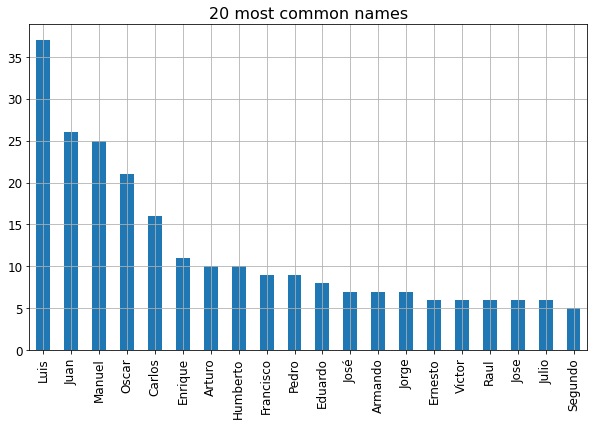

In [31]:
df['first_name'].value_counts().head(20).plot(kind='bar', figsize=(10,6), grid=True, fontsize = 12)
plt.title('20 most common names', fontsize=16)

Text(0.5, 1.0, '20 most popular Boxing Clubs')

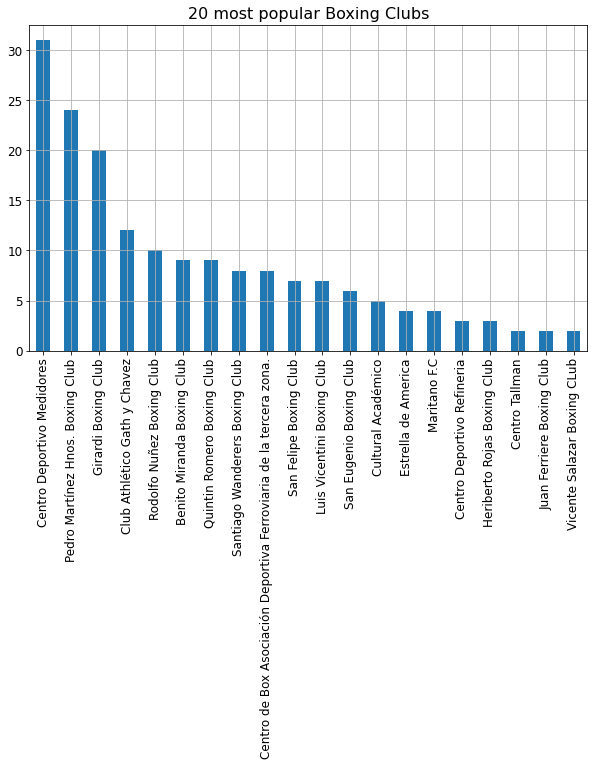

In [34]:
df['club_affiliation'].value_counts().head(20).plot(kind='bar', figsize=(10,6), grid=True, fontsize = 12)
plt.title('20 most popular Boxing Clubs', fontsize=16)

Text(0.5, 1.0, '10 most cities of origin')

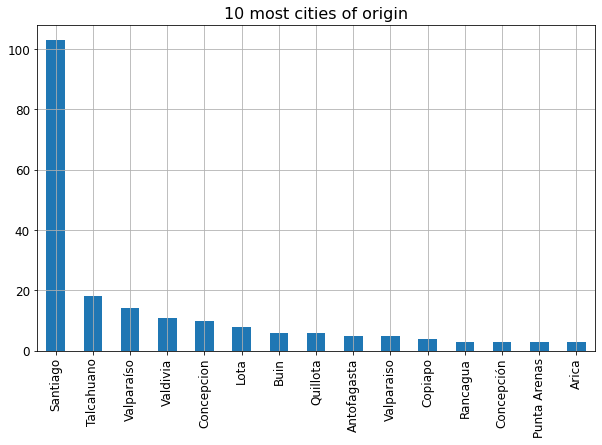

In [96]:
df['city'].value_counts().head(15).plot(kind='bar', figsize=(10,6), grid=True, fontsize = 12)
plt.title('10 most cities of origin', fontsize=16)

In [105]:
#function to transform overall rating into an ordinal variable
def weight_category(row):
    if (0 <= row <=  48.00):
        return 'light_fly'
    if ( 48.01 <= row <=51.00):
        return 'fly'
    if (51.01 <= row <=  54.00):
        return 'bantam'
    if (54.01 <= row <=  57.00):
        return 'feather'
    if (57.01 <= row <=  60.00):
        return 'light'
    if (60.01 <= row <=  64.00):
        return 'light_welther'
    if (64.01 <= row <=  69.00):
        return 'welther'
    if (69.01 <= row <=  75.00):
        return 'middle'
    if (75.01 <= row <=  81.00):
        return 'light_heavy'
    if (81.01 <= row <=  91.00):
        return 'heavy'
    if (91.01 <= row <=  120.00):
        return 'super_heavy'
    else:
        return 'no_data'
    

In [106]:
#apply function
df['weight_cat'] = df['weight_kgs'].apply(weight_category)

<AxesSubplot:ylabel='weight_cat'>

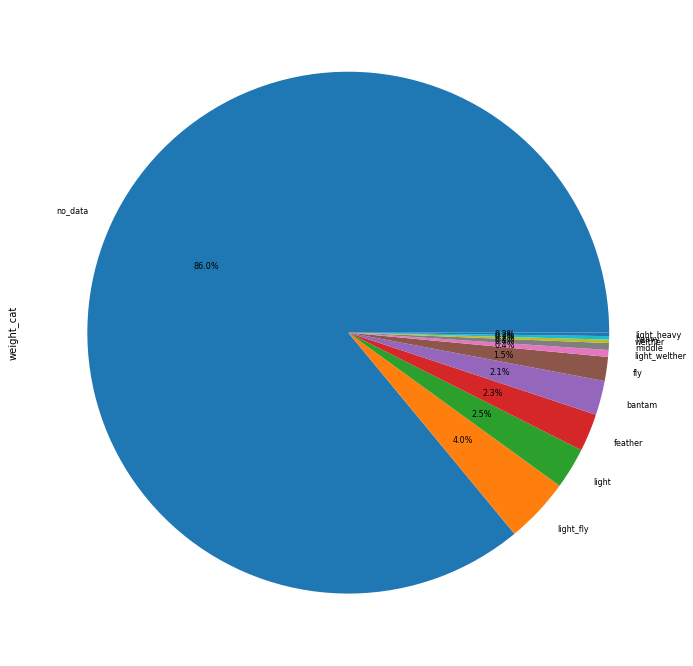

In [107]:
df['weight_cat'].value_counts().plot.pie(figsize=(12,12), autopct="%.1f%%", fontsize = 8)

<AxesSubplot:ylabel='weight'>

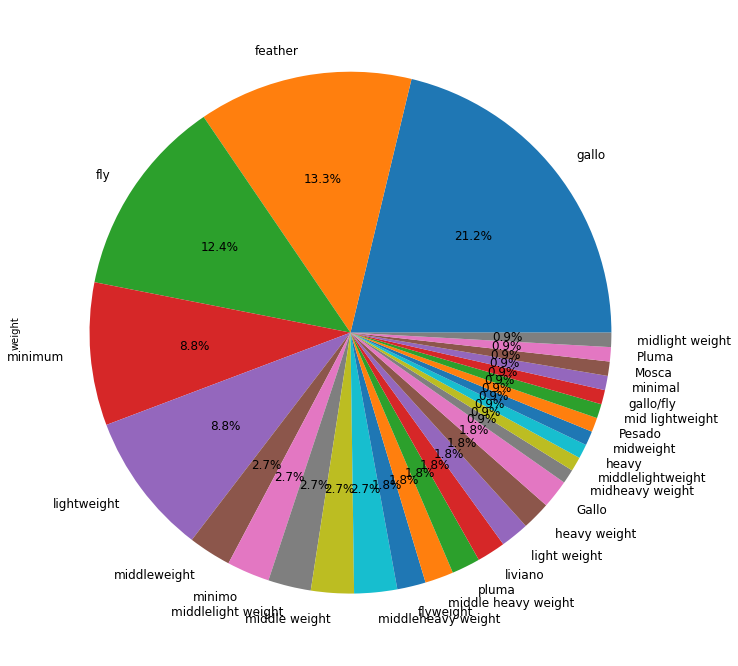

In [108]:
df['weight'].value_counts().plot.pie(figsize=(12,12), autopct="%.1f%%", fontsize = 12)

Text(0.5, 1.0, 'Boxers Weights')

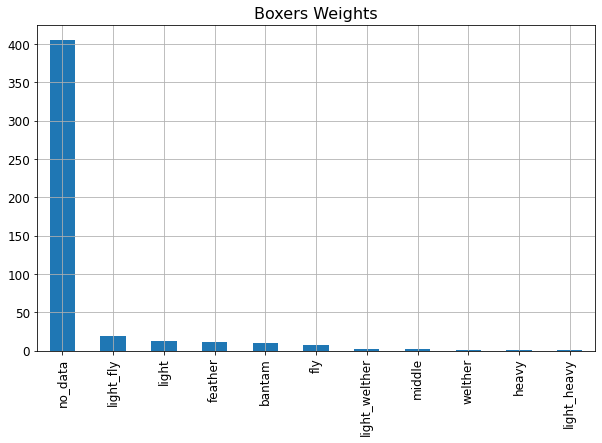

In [109]:
df['weight_cat'].value_counts().head(12).plot(kind='bar', figsize=(10,6), grid=True, fontsize = 12)
plt.title('Boxers Weights', fontsize=16)

Text(0.5, 1.0, 'Boxers Weights 2')

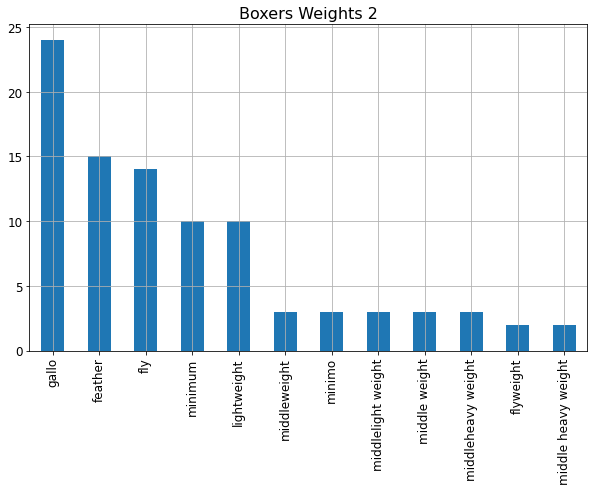

In [110]:
df['weight'].value_counts().head(12).plot(kind='bar', figsize=(10,6), grid=True, fontsize = 12)
plt.title('Boxers Weights 2', fontsize=16)